# imporing libraries

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

# imprting Dataset

In [2]:
df = pd.read_csv('/Users/dakshparikh/Downloads/zomato.csv')

In [3]:
df.shape

(51717, 17)

In [4]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [6]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [7]:
def see_lack(i):
    print("-----------------types-----------------")
    print(i.dtypes)
    print("")
    print("----check columns which has missing values----")
    print(i.isnull().any())
    print("")
    print("----count missing values in each columns----")
    print(i.isnull().sum())
    print("")
    print("--------------data shape----------------")
    print(i.shape)

In [8]:
see_lack(df)

-----------------types-----------------
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

----check columns which has missing values----
url                            False
address                        False
name                           False
online_order                   False
book_table                     False
rate                            True
votes                         

# cleaning dataset

In [9]:
del df['url']
del df['phone']
del df['address']
del df['location']

In [10]:
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [11]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)

In [12]:
df

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [13]:
df=df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'city'})

In [14]:
X=df.copy()

In [15]:
X.online_order=X.online_order.apply(lambda x: '1' if str(x)=='Yes' else '0')
X.book_table=X.book_table.apply(lambda x: '1' if str(x)=='Yes' else '0')

In [16]:
X.rate.dtype

dtype('O')

In [17]:
X.rate=X.rate.astype(str)
X.rate=X.rate.apply(lambda x : x.replace('/5',''))
X.rate=X.rate.astype(float)

In [18]:
X

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1,1,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,1,0,3.8,286,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,Onesta,1,1,4.6,2556,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,1,0,4.0,324,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,1,0,4.2,504,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [19]:
X.rate.dtype

dtype('float64')

In [20]:
X.cost.dtype

dtype('O')

In [21]:
X.cost=X.cost.astype(str)
X.cost=X.cost.apply(lambda y : y.replace(',',''))
X.cost=X.cost.astype(float)

In [22]:
X.cost.dtype

dtype('float64')

In [23]:
X.online_order=X.online_order.astype(float)
X.book_table=X.book_table.astype(float)
X.votes=X.votes.astype(float)

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 13 columns):
name            51717 non-null object
online_order    51717 non-null float64
book_table      51717 non-null float64
rate            41665 non-null float64
votes           51717 non-null float64
rest_type       51490 non-null object
dish_liked      23639 non-null object
cuisines        51672 non-null object
cost            51371 non-null float64
reviews_list    51717 non-null object
menu_item       51717 non-null object
type            51717 non-null object
city            51717 non-null object
dtypes: float64(5), object(8)
memory usage: 5.1+ MB


In [25]:
X.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

In [26]:
X_del=X.copy()
X_del.dropna(how='any',inplace=True)

In [27]:
X_del.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [28]:
X_del.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23259 entries, 0 to 51715
Data columns (total 13 columns):
name            23259 non-null object
online_order    23259 non-null float64
book_table      23259 non-null float64
rate            23259 non-null float64
votes           23259 non-null float64
rest_type       23259 non-null object
dish_liked      23259 non-null object
cuisines        23259 non-null object
cost            23259 non-null float64
reviews_list    23259 non-null object
menu_item       23259 non-null object
type            23259 non-null object
city            23259 non-null object
dtypes: float64(5), object(8)
memory usage: 2.5+ MB


In [29]:
X_del.drop_duplicates(keep='first',inplace=True)

In [30]:
X_del

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,1.0,1.0,4.1,775.0,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,1.0,0.0,4.1,787.0,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,1.0,0.0,3.8,918.0,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0.0,0.0,3.7,88.0,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,0.0,0.0,3.8,166.0,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,Timepass Dinner,1.0,0.0,3.8,286.0,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
7,Onesta,1.0,1.0,4.6,2556.0,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,Penthouse Cafe,1.0,0.0,4.0,324.0,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,Smacznego,1.0,0.0,4.2,504.0,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
10,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,1.0,0.0,4.1,402.0,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


# Data Visualization

Text(0.5, 1.0, 'Restaurants delivering online or Not')

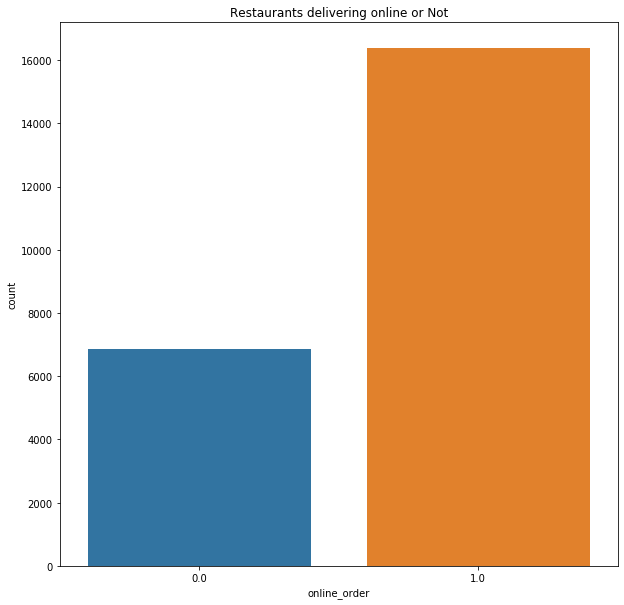

In [31]:
sns.countplot(X_del['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

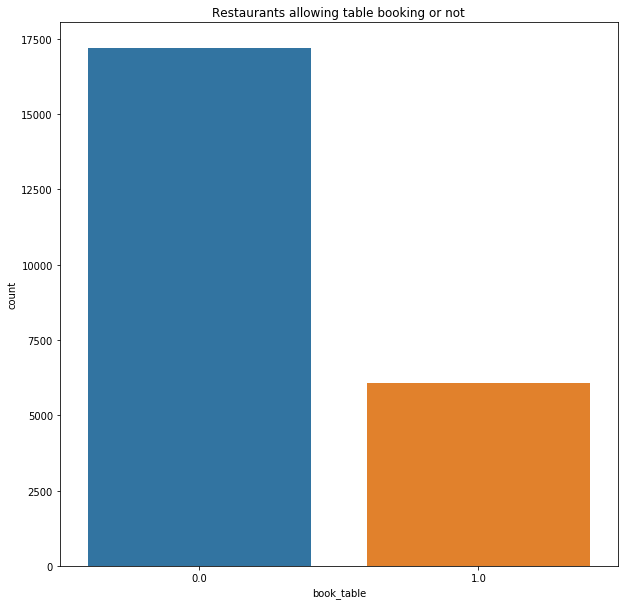

In [32]:
sns.countplot(X_del['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants allowing table booking or not')

Text(0.5, 1.0, 'Location')

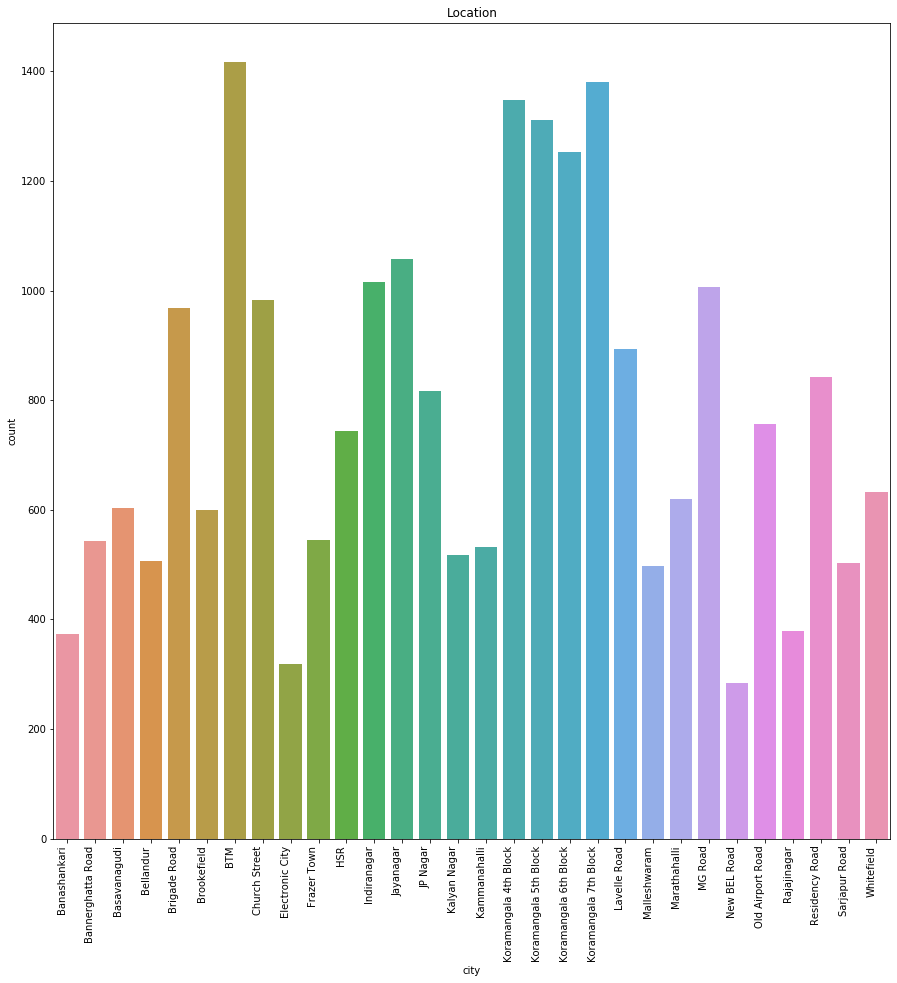

In [33]:
sns.countplot(X_del['city'])
sns.countplot(X_del['city']).set_xticklabels(sns.countplot(X_del['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Location')

Text(0.5, 1.0, 'Restuarant Type')

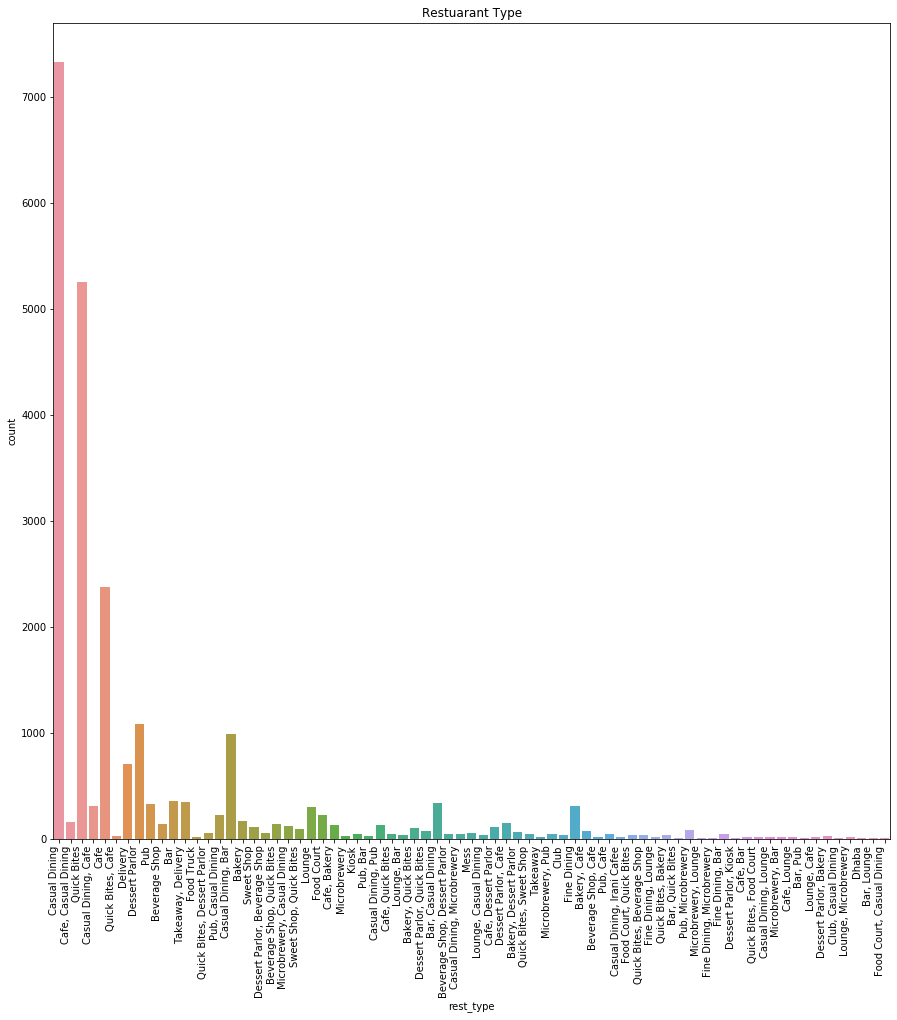

In [34]:
sns.countplot(X_del['rest_type'])
sns.countplot(X_del['rest_type']).set_xticklabels(sns.countplot(X_del['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

Text(0.5, 1.0, 'Type of Service')

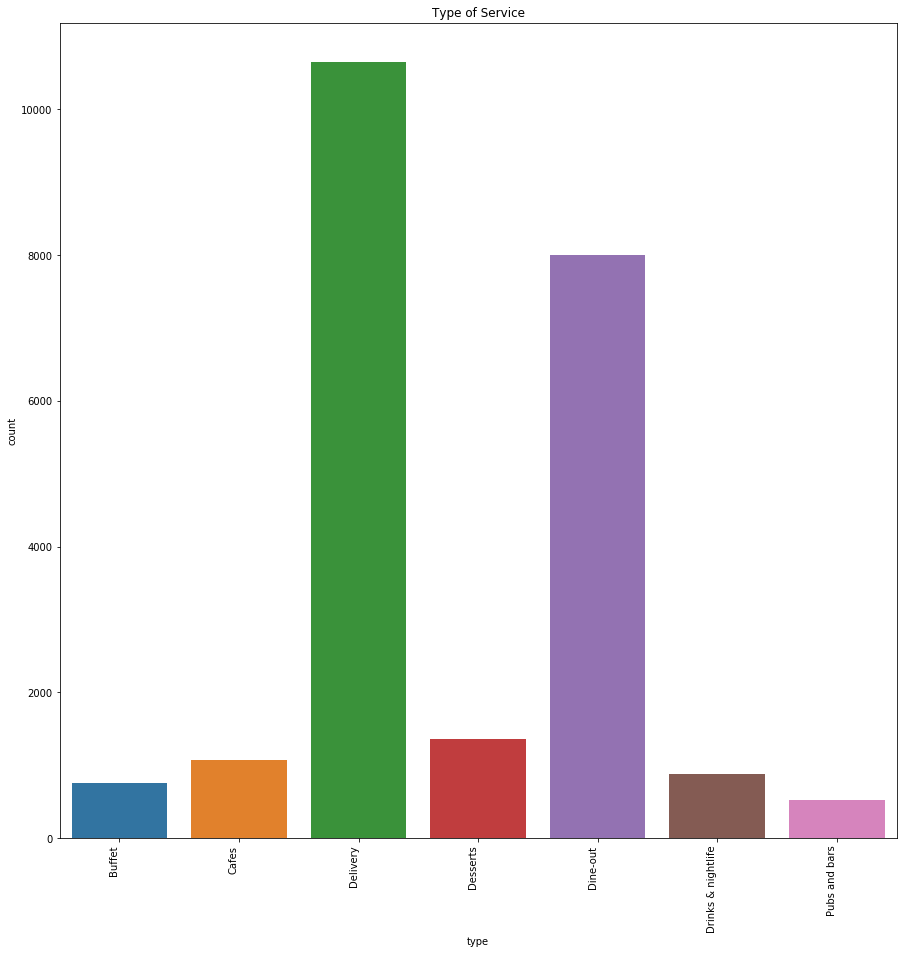

In [35]:
sns.countplot(X_del['type'])
sns.countplot(X_del['type']).set_xticklabels(sns.countplot(X_del['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

Text(0.5, 1.0, 'Cost of Restuarant')

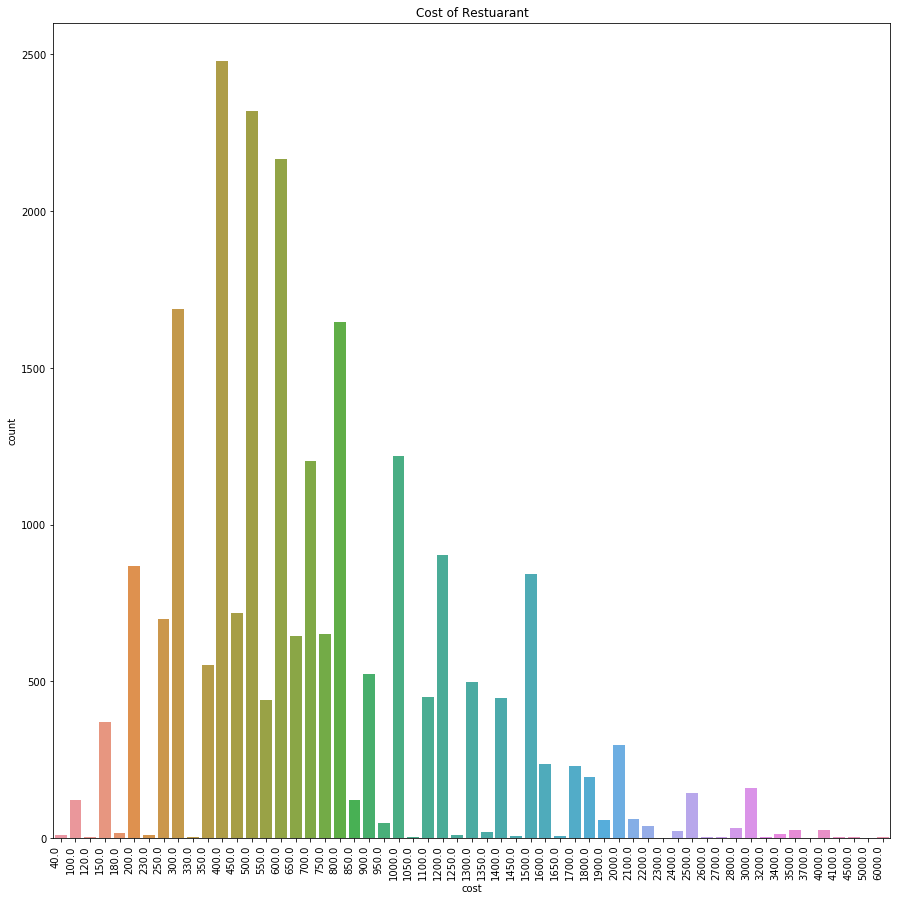

In [36]:
sns.countplot(X_del['cost'])
sns.countplot(X_del['cost']).set_xticklabels(sns.countplot(X_del['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

In [37]:
for column in X_del.columns:
    if X_del[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        X_del[column] = le.fit_transform(X_del[column])
X_del.dtypes

name              int64
online_order    float64
book_table      float64
rate            float64
votes           float64
rest_type         int64
dish_liked        int64
cuisines          int64
cost            float64
reviews_list      int64
menu_item         int64
type              int64
city              int64
dtype: object

In [38]:
X_df = X_del.drop(columns=['rate'])
y_df = X_del['rate']

In [39]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X_df,y_df)

# Linear Regressor

In [40]:
linreg=LinearRegression()

In [41]:
linreg.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
Y_linreg_pred=linreg.predict(x1_test)

In [43]:
r2_score(y1_test,Y_linreg_pred)

0.27881600200209267

In [44]:
linearrig = linreg.score(x1_train,y1_train)
linearrig

0.29001962778849244

# Random Forest

In [45]:
rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(x1_train,y1_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [46]:
Y_rgreg_pred=rf_reg.predict(x1_test)

In [47]:
r2_score(y1_test,Y_rgreg_pred)

0.8938959949888998

In [48]:
randomfor = rf_reg.score(x1_train,y1_train)
randomfor

0.9861816512963226

# Ridge Regressor

In [49]:
ridge=RidgeCV(alphas=[1e-10,1e-8,1e-6,1e-2,1e-1,1,10,20,100])
fit_ridge=ridge.fit(x1_train,y1_train)

In [50]:
Y_ridge_pred=ridge.predict(x1_test)

In [51]:
r2_score(y1_test,Y_ridge_pred)

0.278815100719361

In [52]:
ridgereg = ridge.score(x1_train,y1_train)
ridgereg

0.2900196212266293

# Lasso Regressor

In [53]:
lasso=LassoCV(alphas=[1e-3,1e-2,1e-1,1,10,20,100],max_iter=1e2)
fit_lasso=lasso.fit(x1_train,y1_train)

/Users/dakshparikh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [54]:
Y_lasso_pred=lasso.predict(x1_test)

In [55]:
lasso.score(x1_train,y1_train)

0.2899444967033975

In [56]:
lassorig = r2_score(y1_test,Y_lasso_pred)

# KNN regressor

In [57]:
knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(x1_train,y1_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [58]:
Y_knn_pred=knn.predict(x1_test)

In [59]:
r2_score(y1_test,Y_knn_pred)

0.5297976190909724

In [60]:
knnreg = knn.score(x1_train,y1_train)
knnreg

0.7312139018672521

Text(0.5, 1.0, 'model')

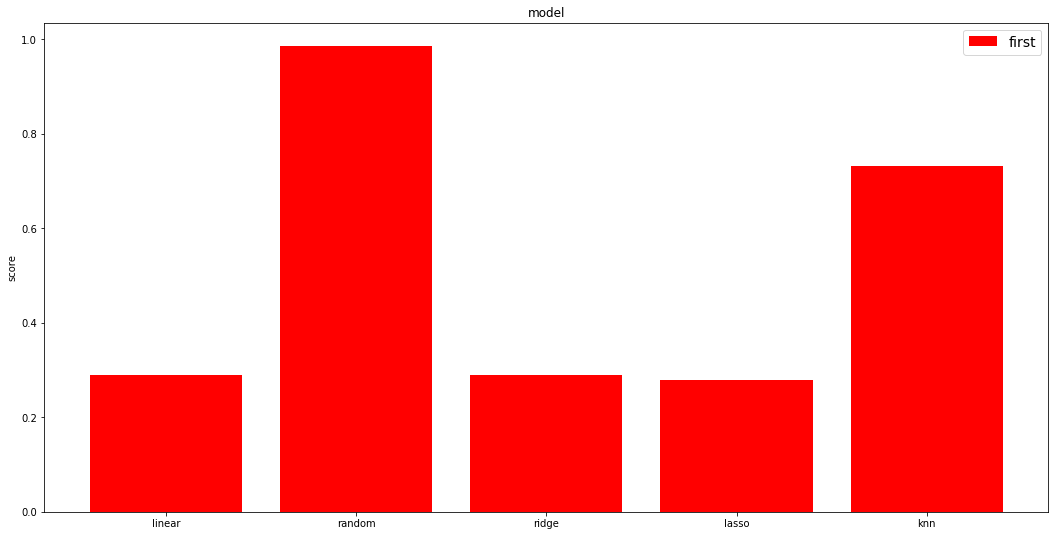

In [61]:
f, ax = plt.subplots(figsize=(18,9))
plt.bar(['linear', 'random', 'ridge', 'lasso', 'knn'], [linearrig, randomfor, ridgereg, lassorig, knnreg], label = 'first',color = ['r'])
ax.legend(fontsize = 14)
plt.ylabel('score')
plt.title('model')

# One hot encoding

In [62]:
Y=X_del.copy()

In [63]:
dummy_rest_type=pd.get_dummies(Y['rest_type'])
dummy_type=pd.get_dummies(Y['type'])
dummy_city=pd.get_dummies(Y['city'])
dummy_cuisines=pd.get_dummies(Y['cuisines'])
dummy_dishliked=pd.get_dummies(Y['dish_liked'])

In [64]:
Y=pd.concat([Y,dummy_rest_type,dummy_type,dummy_city,dummy_cuisines,dummy_dishliked,],axis=1)

In [65]:
del Y['rest_type']
del Y['type']
del Y['city']
del Y['cuisines']
del Y['dish_liked']
#del Y['reviews_list']

In [66]:
Y.head()

,name,online_order,book_table,rate,votes,cost,reviews_list,menu_item,0,1,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
0,1333,1.0,1.0,4.1,775.0,800.0,6414,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2502,1.0,0.0,4.1,787.0,800.0,7718,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2322,1.0,0.0,3.8,918.0,800.0,2147,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71,0.0,0.0,3.7,88.0,300.0,5238,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1100,0.0,0.0,3.8,166.0,600.0,9831,5047,0,0,...,0,0,0,0,0,0,0,0,0,0


# Standardize data

In [67]:
scaler=StandardScaler()

In [68]:
x=Y.drop(['name',#'dish_liked',
          'reviews_list',
          'menu_item',#'cuisines'
         ],axis=1);

In [69]:
x_fit=scaler.fit_transform(x)

In [70]:
x=pd.DataFrame(x_fit,columns=x.columns)

In [71]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Columns: 6990 entries, online_order to 5193
dtypes: float64(6990)
memory usage: 1.2 GB


In [72]:
x.head()

,online_order,book_table,rate,votes,cost,0,1,2,3,4,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
0,0.647661,1.684697,0.455759,0.152232,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.12506,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
1,0.647661,-0.593579,0.455759,0.163007,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.12506,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
2,0.647661,-0.593579,-0.248229,0.280635,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.12506,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
3,-1.544017,-0.593579,-0.482891,-0.464640,-0.871345,-0.084804,-0.05456,-0.051711,-0.064393,-0.12506,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
4,-1.544017,-0.593579,-0.248229,-0.394602,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.12506,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559


In [73]:
x.columns

Index(['online_order',   'book_table',         'rate',        'votes',
               'cost',              0,              1,              2,
                    3,              4,
       ...
                 5184,           5185,           5186,           5187,
                 5188,           5189,           5190,           5191,
                 5192,           5193],
      dtype='object', length=6990)

In [74]:
x.describe()

,online_order,book_table,rate,votes,cost,0,1,2,3,4,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
count,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,...,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04,2.324800e+04
mean,2.872845e-15,1.040728e-14,2.169223e-15,-1.752489e-16,-1.682718e-16,-2.098980e-15,8.117025e-17,-2.189325e-15,-1.278944e-16,-3.855905e-15,...,-4.191105e-16,-1.204919e-15,3.785996e-16,-2.550243e-15,-6.754244e-16,1.788816e-15,9.330234e-16,9.330236e-16,9.324122e-16,7.496418e-16
std,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,...,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00,1.000022e+00
min,-1.544017e+00,-5.935786e-01,-4.941480e+00,-5.436572e-01,-1.370902e+00,-8.480419e-02,-5.456036e-02,-5.171100e-02,-6.439340e-02,-1.250601e-01,...,-6.558682e-03,-9.275576e-03,-6.558682e-03,-2.272532e-02,-6.558682e-03,-1.466692e-02,-6.558682e-03,-6.558682e-03,-6.558682e-03,-6.558682e-03
25%,-1.544017e+00,-5.935786e-01,-2.482287e-01,-4.502733e-01,-6.792074e-01,-8.480419e-02,-5.456036e-02,-5.171100e-02,-6.439340e-02,-1.250601e-01,...,-6.558682e-03,-9.275576e-03,-6.558682e-03,-2.272532e-02,-6.558682e-03,-1.466692e-02,-6.558682e-03,-6.558682e-03,-6.558682e-03,-6.558682e-03
50%,6.476613e-01,-5.935786e-01,2.210964e-01,-3.416248e-01,-2.949327e-01,-8.480419e-02,-5.456036e-02,-5.171100e-02,-6.439340e-02,-1.250601e-01,...,-6.558682e-03,-9.275576e-03,-6.558682e-03,-2.272532e-02,-6.558682e-03,-1.466692e-02,-6.558682e-03,-6.558682e-03,-6.558682e-03,-6.558682e-03
75%,6.476613e-01,1.684697e+00,6.904215e-01,-7.597921e-03,4.736168e-01,-8.480419e-02,-5.456036e-02,-5.171100e-02,-6.439340e-02,-1.250601e-01,...,-6.558682e-03,-9.275576e-03,-6.558682e-03,-2.272532e-02,-6.558682e-03,-1.466692e-02,-6.558682e-03,-6.558682e-03,-6.558682e-03,-6.558682e-03
max,6.476613e-01,1.684697e+00,2.333059e+00,1.457016e+01,1.008049e+01,1.179187e+01,1.832833e+01,1.933825e+01,1.552954e+01,7.996158e+00,...,1.524697e+02,1.078100e+02,1.524697e+02,4.400379e+01,1.524697e+02,6.818064e+01,1.524697e+02,1.524697e+02,1.524697e+02,1.524697e+02


In [75]:
split_x=x.drop(['rate'],axis=1)
split_x.info()
split_x.shape
split_x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23248 entries, 0 to 23247
Columns: 6989 entries, online_order to 5193
dtypes: float64(6989)
memory usage: 1.2 GB


,online_order,book_table,votes,cost,0,1,2,3,4,5,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
0,0.647661,1.684697,0.152232,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
1,0.647661,-0.593579,0.163007,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
2,0.647661,-0.593579,0.280635,0.089342,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
3,-1.544017,-0.593579,-0.464640,-0.871345,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
4,-1.544017,-0.593579,-0.394602,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
5,0.647661,-0.593579,-0.286852,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
6,0.647661,1.684697,1.751431,-0.294933,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
7,0.647661,-0.593579,-0.252731,-0.102795,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
8,0.647661,-0.593579,-0.091105,-0.391001,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559
9,0.647661,-0.593579,-0.182693,-0.487070,-0.084804,-0.05456,-0.051711,-0.064393,-0.125060,-0.121098,...,-0.006559,-0.009276,-0.006559,-0.022725,-0.006559,-0.014667,-0.006559,-0.006559,-0.006559,-0.006559


In [76]:
Y_init=x.drop(x.columns.difference(['rate']),axis=1)
split_y=Y_init
split_y=split_y.astype(float)
split_y.shape
split_y

,rate
0,0.455759
1,0.455759
2,-0.248229
3,-0.482891
4,-0.248229
5,-0.248229
6,1.629072
7,0.221096
8,0.690422
9,0.455759


# Feature selection 

In [77]:
bestfeatures=SelectKBest(k='all')
fit=bestfeatures.fit(split_x,split_y)

/Users/dakshparikh/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
scores=pd.DataFrame(fit.scores_)
columns_=pd.DataFrame(split_x.columns)

In [79]:
scores

,0
0,21.801993
1,177.105552
2,416.418856
3,143.676015
4,3.056192
5,5.622512
6,1.581188
7,13.504280
8,7.066041
9,20.898047


In [80]:
columns_

,0
0,online_order
1,book_table
2,votes
3,cost
4,0
5,1
6,2
7,3
8,4
9,5


In [81]:
featurescore=pd.concat([columns_,scores],axis=1)
                       

In [82]:
featurescore.columns = ['Features','Score']

In [83]:
featurescore

,Features,Score
0,online_order,21.801993
1,book_table,177.105552
2,votes,416.418856
3,cost,143.676015
4,0,3.056192
5,1,5.622512
6,2,1.581188
7,3,13.504280
8,4,7.066041
9,5,20.898047


In [84]:
col_select=featurescore.nlargest(800,'Score')

In [85]:
col_select.drop('Score',axis=1,inplace=True)

In [86]:
col_select_list=list(col_select.Features)

In [87]:
col_select_list

[1873,
 1855,
 3137,
 3023,
 'votes',
 134,
 3180,
 3267,
 1596,
 1109,
 4054,
 'book_table',
 3114,
 4245,
 1158,
 2510,
 1458,
 'cost',
 4053,
 728,
 3126,
 4062,
 59,
 1649,
 4811,
 3344,
 2609,
 740,
 1304,
 1760,
 104,
 1241,
 4642,
 1180,
 5033,
 643,
 642,
 1660,
 1284,
 1632,
 2808,
 2666,
 84,
 4534,
 32,
 1323,
 1318,
 1457,
 3729,
 1324,
 813,
 382,
 847,
 934,
 4321,
 1088,
 62,
 41,
 1386,
 80,
 338,
 4639,
 1345,
 3056,
 2874,
 3848,
 4526,
 589,
 593,
 590,
 1473,
 1453,
 271,
 2068,
 602,
 1791,
 2686,
 809,
 3460,
 1879,
 1325,
 878,
 4793,
 3356,
 4044,
 346,
 1710,
 496,
 1432,
 1809,
 3832,
 1555,
 3833,
 2438,
 419,
 2256,
 2611,
 3530,
 789,
 4278,
 1472,
 1008,
 89,
 4252,
 1517,
 21,
 1714,
 2422,
 2453,
 293,
 1198,
 764,
 2657,
 2774,
 431,
 4378,
 1830,
 2279,
 793,
 3012,
 4182,
 767,
 61,
 1183,
 1184,
 3858,
 978,
 1395,
 3050,
 153,
 1201,
 1003,
 260,
 4142,
 71,
 718,
 4359,
 1196,
 769,
 274,
 3537,
 2196,
 4018,
 1251,
 495,
 2195,
 1920,
 3950,
 4885

In [88]:
x_select=split_x.loc[:,col_select_list]

In [89]:
x_select.head()

,1873,1855,3137,3023,votes,134,134,3180,3267,1596,...,29,29,4675,1473,1473,3934,466,466,1257,1257
0,-0.014667,-0.019679,-0.023654,-0.019679,0.152232,-0.0286,-0.022725,-0.025409,-0.016067,-0.009276,...,-0.031469,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.009276,-0.01136,-0.006559
1,-0.014667,-0.019679,-0.023654,-0.019679,0.163007,-0.0286,-0.022725,-0.025409,-0.016067,-0.009276,...,-0.031469,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.009276,-0.01136,-0.006559
2,-0.014667,-0.019679,-0.023654,-0.019679,0.280635,-0.0286,-0.022725,-0.025409,-0.016067,-0.009276,...,-0.031469,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.009276,-0.01136,-0.006559
3,-0.014667,-0.019679,-0.023654,-0.019679,-0.464640,-0.0286,-0.022725,-0.025409,-0.016067,-0.009276,...,-0.031469,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.009276,-0.01136,-0.006559
4,-0.014667,-0.019679,-0.023654,-0.019679,-0.394602,-0.0286,-0.022725,-0.025409,-0.016067,-0.009276,...,-0.031469,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.01136,-0.009276,-0.01136,-0.006559


In [90]:
x_select = x_select.loc[:, ~x_select.columns.duplicated()]

In [91]:
X_train,X_test,y_train,y_test=train_test_split(x_select,split_y,test_size=0.05,random_state=42)

# Linear Regressor

In [92]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [93]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
Y_linreg_pred=linreg.predict(X_test)

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,Y_linreg_pred)

0.6752057179304645

In [96]:
linearrig_n = linreg.score(X_train,y_train)
linearrig_n

0.6849453755494717

# Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=100,random_state=42)
rf_reg.fit(X_train,y_train)

/Users/dakshparikh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [98]:
Y_rgreg_pred=rf_reg.predict(X_test)

In [99]:
r2_score(y_test,Y_rgreg_pred)

0.9238728372259957

In [100]:
randomfor_n = rf_reg.score(X_train,y_train)
randomfor_n

0.9805935216321096

# Ridge Regressor

In [101]:
from sklearn.linear_model import RidgeCV
ridge=RidgeCV(alphas=[1e-10,1e-8,1e-6,1e-2,1e-1,1,10,20,100])
fit_ridge=ridge.fit(X_train,y_train)

/Users/dakshparikh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:1441: RuntimeWarning: divide by zero encountered in true_divide
  squared_errors = (c / G_diag) ** 2


In [102]:
Y_ridge_pred=ridge.predict(X_test)

In [103]:
r2_score(y_test,Y_ridge_pred)

0.6752703444214343

In [104]:
ridgereg_n = ridge.score(X_train,y_train)
ridgereg_n

0.688213083757155

# Lasso Regressor

In [105]:
from sklearn.linear_model import LassoCV
lasso=LassoCV(alphas=[1e-3,1e-2,1e-1,1,10,20,100],max_iter=1e2)
fit_lasso=lasso.fit(X_train,y_train)

/Users/dakshparikh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/dakshparikh/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [106]:
Y_lasso_pred=lasso.predict(X_test)

In [107]:
lasso.score(X_train,y_train)

0.6874316212072766

In [108]:
lassorig_n = r2_score(y_test,Y_lasso_pred)
lassorig_n

0.6733093681291167

# KNN regressor

In [109]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [110]:
Y_knn_pred=knn.predict(X_test)

In [111]:
r2_score(y_test,Y_knn_pred)

0.8430378259370607

In [112]:
knnreg_n = knn.score(X_train,y_train)
knnreg_n

0.9030907906718231

Text(0.5, 1.0, 'model')

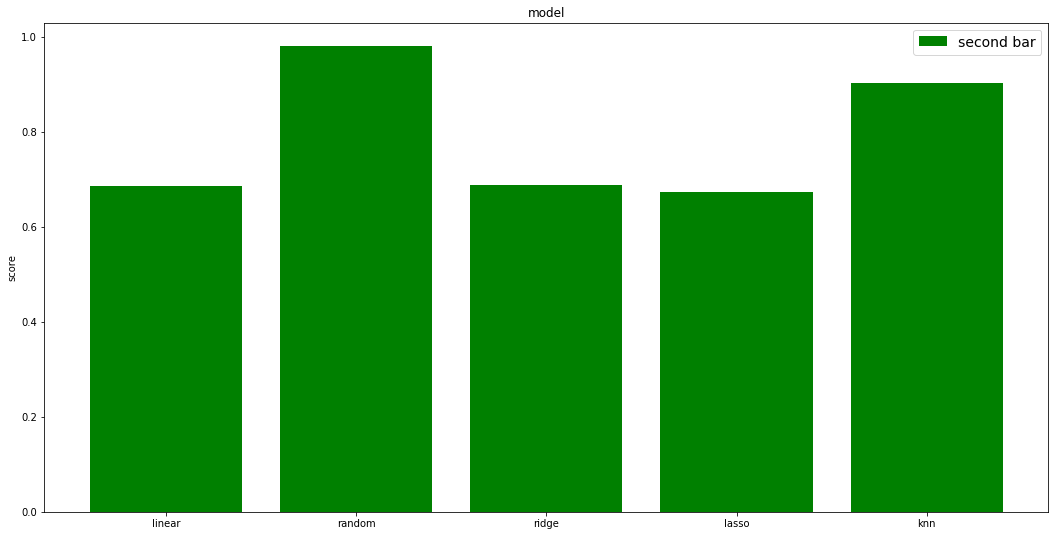

In [113]:
f, ax = plt.subplots(figsize=(18,9))
plt.bar(['linear', 'random', 'ridge', 'lasso', 'knn'], [linearrig_n, randomfor_n, ridgereg_n, lassorig_n, knnreg_n], label = 'second bar',color = ['green'])
ax.legend(fontsize = 14)
plt.ylabel('score')
plt.title('model')

Text(0.5, 1.0, 'model')

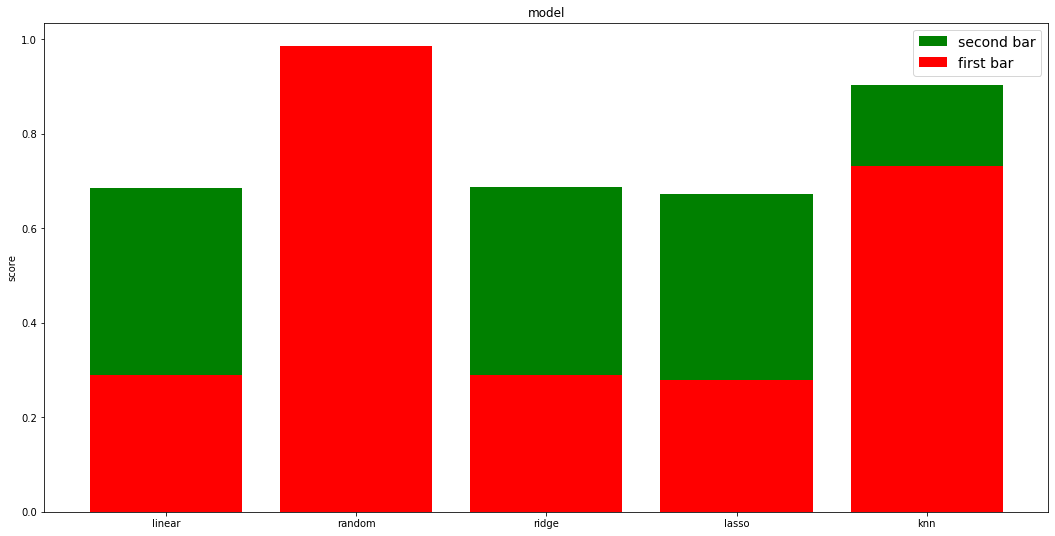

In [114]:
f, ax = plt.subplots(figsize=(18,9))
plt.bar(['linear', 'random', 'ridge', 'lasso', 'knn'], [linearrig_n, randomfor_n, ridgereg_n, lassorig_n, knnreg_n], label = 'second bar',color = ['green'])
plt.bar(['linear', 'random', 'ridge', 'lasso', 'knn'], [linearrig, randomfor, ridgereg, lassorig, knnreg], label = 'first bar',color = ['red'])

ax.legend(fontsize = 14)
plt.ylabel('score')
plt.title('model')

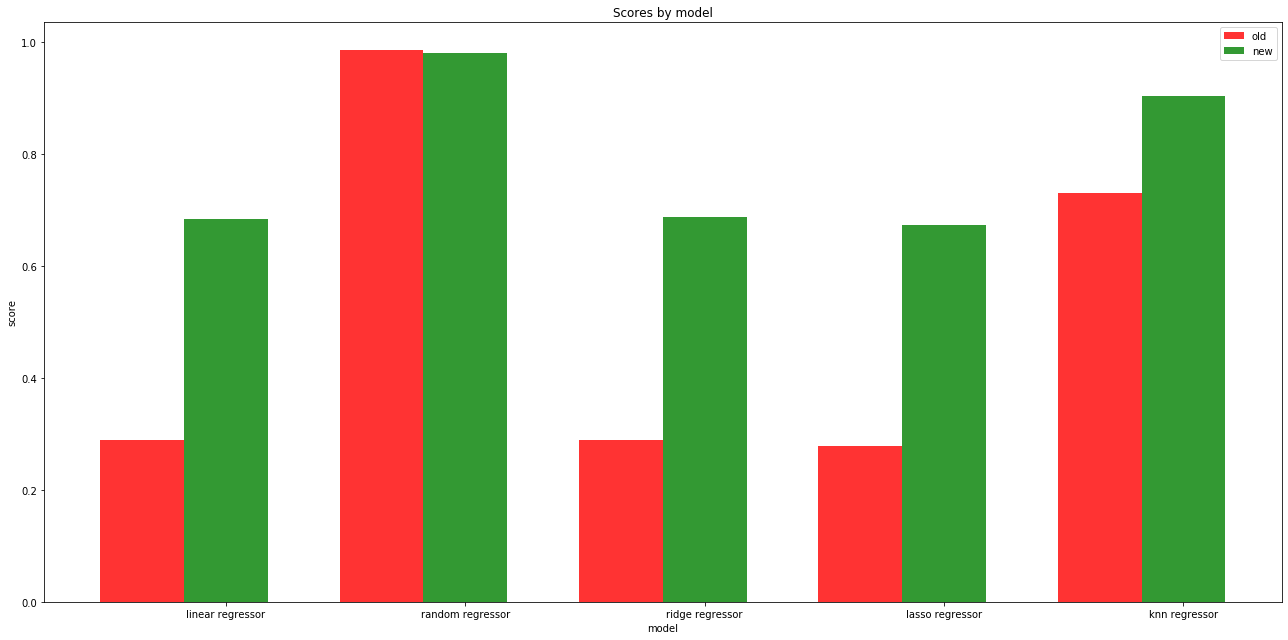

In [115]:
n_groups = 5
means_frank = [linearrig, randomfor, ridgereg, lassorig, knnreg]
means_guido = [linearrig_n, randomfor_n, ridgereg_n, lassorig_n, knnreg_n]

fig, ax = plt.subplots(figsize=(18,9))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='r',
label='old')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='new')

plt.xlabel('model')
plt.ylabel('score')
plt.title('Scores by model')
plt.xticks(index + bar_width, ['linear regressor', 'random regressor', 'ridge regressor', 'lasso regressor', 'knn regressor'])
plt.legend()
plt.figsize=(18,9)

plt.tight_layout()
plt.show()

# Mulit-label Classification task

In [116]:
data_class=Y.copy()
data_class.head()

,name,online_order,book_table,rate,votes,cost,reviews_list,menu_item,0,1,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
0,1333,1.0,1.0,4.1,775.0,800.0,6414,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2502,1.0,0.0,4.1,787.0,800.0,7718,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2322,1.0,0.0,3.8,918.0,800.0,2147,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
3,71,0.0,0.0,3.7,88.0,300.0,5238,5047,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1100,0.0,0.0,3.8,166.0,600.0,9831,5047,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
del data_class['name']
del data_class['menu_item']
del data_class['reviews_list']
data_class.head()

,online_order,book_table,rate,votes,cost,0,1,2,3,4,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
0,1.0,1.0,4.1,775.0,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,4.1,787.0,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,3.8,918.0,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,3.7,88.0,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,3.8,166.0,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
x_class=data_class.drop(['online_order','book_table'],axis=1)
y_class=data_class.drop(data_class.columns.difference(['online_order','book_table']),axis=1)

In [119]:
x_class

,rate,votes,cost,0,1,2,3,4,5,6,...,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193
0,4.1,775.0,800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,787.0,800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.8,918.0,800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.7,88.0,300.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.8,166.0,600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.8,286.0,600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,4.6,2556.0,600.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4.0,324.0,700.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4.2,504.0,550.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,4.1,402.0,500.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
y_class

,online_order,book_table
0,1.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,0.0
4,0.0,0.0
5,1.0,0.0
7,1.0,1.0
8,1.0,0.0
9,1.0,0.0
10,1.0,0.0


# Feature selection

In [121]:
bestfeatures_class=SelectKBest(k='all')
fit_class_oo=bestfeatures_class.fit(x_class,y_class.online_order)
fit_class_bt=bestfeatures_class.fit(x_class,y_class.book_table)

In [122]:
fit_class_oo

SelectKBest(k='all', score_func=<function f_classif at 0x1a16094f28>)

In [123]:
class_score=pd.DataFrame(fit_class_oo.scores_)
class_columns_=pd.DataFrame(x_class.columns)

In [124]:
featureclass_score=pd.concat([class_columns_,class_score],axis=1)

In [125]:
featureclass_score.columns=['Features','Score']

In [126]:
feature_select=featureclass_score.nlargest(90,'Score')

In [127]:
feature_select_list=list(feature_select.Features)

In [128]:
x_class_select=x_class.loc[:,feature_select_list]

In [129]:
x_class_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23248 entries, 0 to 51715
Columns: 229 entries, cost to 1233
dtypes: float64(3), uint8(226)
memory usage: 5.7 MB


In [130]:
x_class_select

,cost,rate,votes,62,62,62,21,21,21,21,...,881,881,887,887,914,914,982,982,1233,1233
0,800.0,4.1,775.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,800.0,4.1,787.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,800.0,3.8,918.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,300.0,3.7,88.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,600.0,3.8,166.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,600.0,3.8,286.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,600.0,4.6,2556.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,700.0,4.0,324.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,550.0,4.2,504.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,500.0,4.1,402.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
x_class_select = x_class_select.loc[:, ~x_class_select.columns.duplicated()]

In [132]:
X_class_train,X_class_test,y_class_train,y_class_test=train_test_split(x_class_select,y_class,test_size=0.05,random_state=42)

# RandomForestClassifier

In [133]:
from sklearn.ensemble import RandomForestClassifier
forest_class=RandomForestClassifier(n_estimators=100,random_state=42)

In [134]:
forest_class.fit(X_class_train,y_class_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [135]:
forest_class.predict(X_class_test)

array([[1., 0.],
       [1., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [0., 0.],
       [1., 1.]])

In [136]:
forest_class.score(X_class_train,y_class_train)

0.9917138329182703

In [137]:
random = forest_class.score(X_class_test,y_class_test)
random

0.9613069647463457

# KNN

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn_class=KNeighborsClassifier(n_jobs=-1)

In [139]:
knn_class.fit(X_class_train,y_class_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [140]:
knn_class.predict(X_class_test)

array([[1., 0.],
       [1., 0.],
       [0., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 1.]])

In [141]:
knn_class.score(X_class_train,y_class_train)


0.9134254018564637

In [142]:
knn = knn_class.score(X_class_test,y_class_test)
knn

0.8555460017196904

Text(0.5, 1.0, 'model')

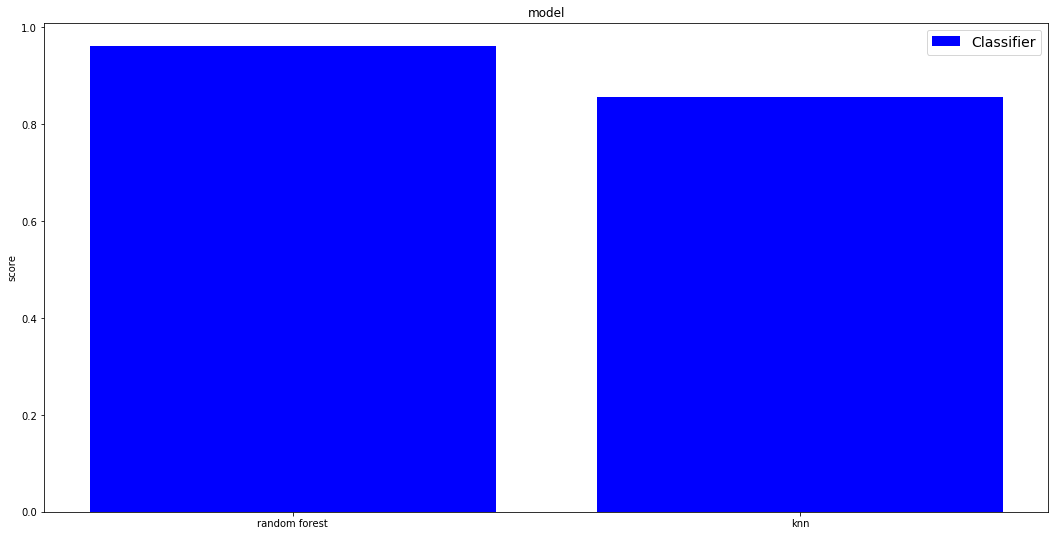

In [143]:
f, ax = plt.subplots(figsize=(18,9))
plt.bar(['Random Forest', 'Knn'], [random, knn], label = 'Classifier',color = ['b'])
ax.legend(fontsize = 14)
plt.ylabel('score')
plt.title('model')